In [1]:
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
from geonotebook.wrappers import RasterData

rd = RasterData('/data/doruk/srtm/srtm_all.vrt')

In [3]:
from matplotlib import pylab as plt
# cmap = plt.get_cmap('magma', 10)
cmap = plt.get_cmap('winter', 10)

In [4]:
colormap=[{"quantity": 0, "color": '#C2FAB3'},
    {"quantity": 300, "color": '#D4EA86'},
    {"quantity": 600, "color": '#169B28'},
    {"quantity": 900, "color": '#639231'},
    {"quantity": 1200, "color": '#E9B50D'},
    {"quantity": 1500, "color": '#BE4200'},
    {"quantity": 1800, "color": '#770701'},
    {"quantity": 2100, "color": '#6D2308'},
    {"quantity": 2400, "color": '#7B4928'},
    {"quantity": 2700, "color": '#A49288'},
    {"quantity": 3000, "color": '#CCCCCC'}]

In [6]:
M.add_layer(rd[1], opacity=0.7, 
            colormap=colormap, 
            min=0, max=3000, 
            vrt_path='/data/doruk/srtm/srtm_all.vrt')

In [ ]:
M.remove_layer(M.layers[0])

## Just for Fun

In [7]:
from matplotlib.pylab import plt
import numpy as np
import pandas as pd

legend = pd.DataFrame([
    (11, "Open Water", "#476BA0"),
    (12, "Perennial Ice/Snow", "#D1DDF9"),
    (21, "Developed, Open Space","#DDC9C9"),
    (22, "Developed, Low Intensity", "#D89382"),
    (23, "Developed, Medium Intensity", "#ED0000"),
    (24, "Developed High Intensity", "#AA0000"),
    (31, "Barren Land (Rock/Sand/Clay)", "#B2ADA3"),
    (41, "Deciduous Forest", "#68AA63"),
    (42, "Evergreen Forest", "#1C6330"),
    (43, "Mixed Forest", "#B5C98E"),
    (51, "Dwarf Scrub", "#A58C30"),
    (52, "Shrub/Scrub", "#CCBA7C"),
    (71, "Grassland/Herbaceous", "#E2E2C1"),
    (72, "Sedge/Herbaceous", "#C9C977"),
    (73, "Lichens", "#99C147"),
    (74, "Moss", "#77AD93"),
    (81, "Pasture/Hay", "#DBD83D"),
    (82, "Cultivated Crops", "#AA7028"),
    (90, "Woody Wetlands", "#BAD8EA"),
    (95, "Emergent Herbaceous Wetlands","#70A3BA")],
    columns=["Code", "Desc", "Color"])

def highlight(e):
    return 'background-color: {}'.format(e)


In [8]:
from geonotebook.wrappers import RasterData
rd2 = RasterData("data/nlcd_2011_landcover_2011_edition_2014_10_10.tif")

In [9]:
colormap = legend[["Code", "Color"]].rename(columns={
    "Code": "quantity", "Color": "color"}).to_dict("records")

In [10]:
M.add_layer(rd2[1], colormap=colormap, opacity=5.0)

In [20]:
a = M.layers.annotation.rectangles[1].data
_, srtm = next(a)
_, nlcd = next(a)

In [21]:
from skimage.transform import resize

srtm_r = resize(srtm, nlcd.shape, order=0, preserve_range=True)

In [22]:
df = pd.DataFrame({"SRTM": srtm_r.ravel(), "NLCD": nlcd.ravel()})\
    .merge(legend, left_on='NLCD', right_on='Code').drop("Code", axis=1)

In [23]:
df.groupby("Desc")['SRTM'].agg(np.mean)

Desc
Barren Land (Rock/Sand/Clay)    501.608396
Developed High Intensity        496.840391
Developed, Low Intensity        493.850596
Developed, Medium Intensity     487.915074
Developed, Open Space           478.976498
Emergent Herbaceous Wetlands    431.199234
Evergreen Forest                455.120000
Grassland/Herbaceous            468.725000
Mixed Forest                    470.743003
Open Water                      432.575221
Shrub/Scrub                     539.240182
Woody Wetlands                  431.586701
Name: SRTM, dtype: float64

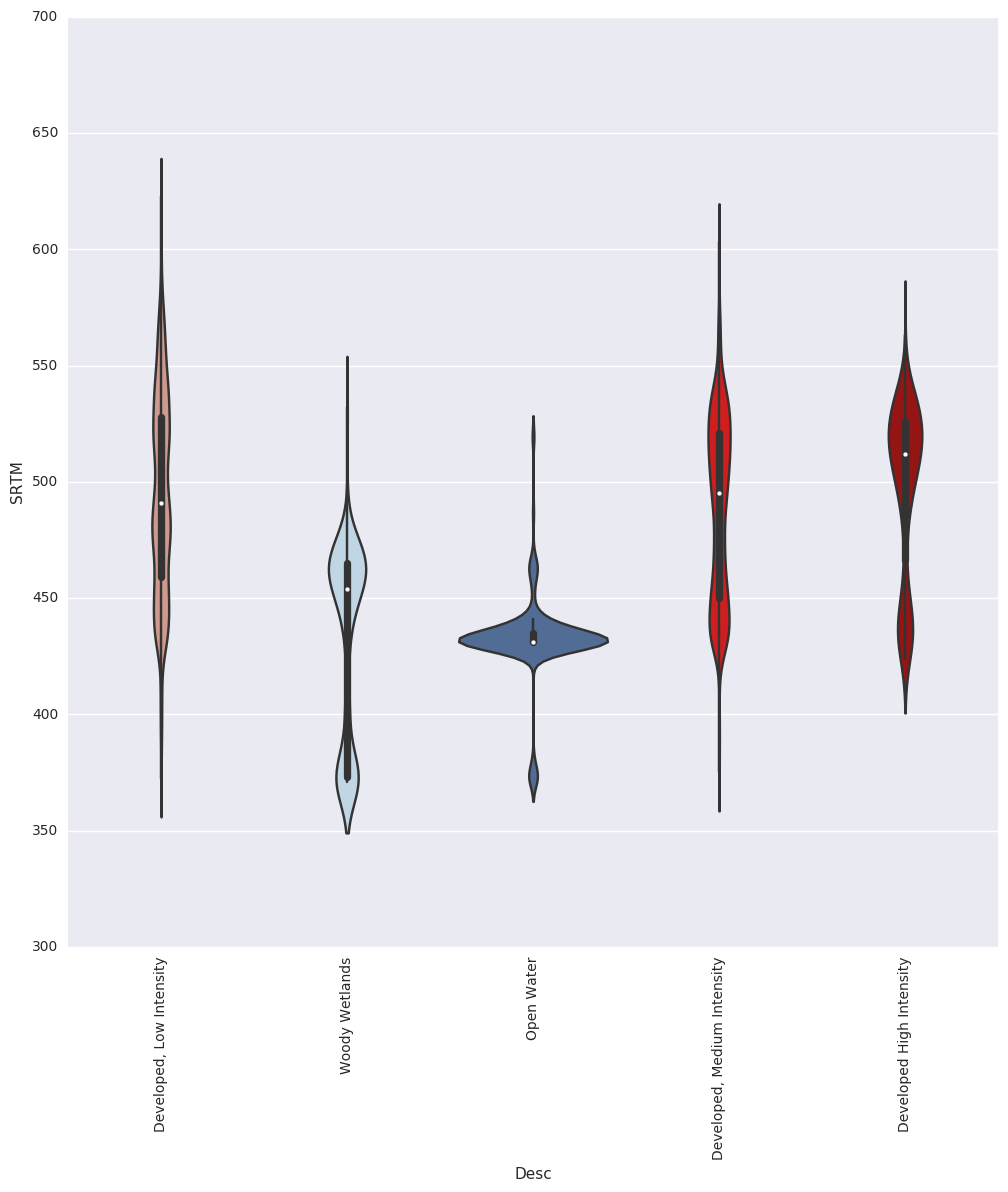

In [24]:
import seaborn as sns
plt.figure(figsize=(12., 12.))

palette = {d['Desc']: d['Color'] for d in legend[['Desc', 'Color']].to_dict('record')}
kinds = [
        "Developed High Intensity",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Open Water",
        "Woody Wetlands"
]
img = sns.violinplot(
    x="Desc", y="SRTM", palette=palette,
    data=df[df['Desc'].isin(kinds)])

for i in img.get_xticklabels():
    i.set_rotation(90)

In [19]:
M.layers.annotation.clear_annotations()

In [25]:
M.remove_layer(M.layers[-1])